In [4]:
# analysis.ipynb

# This is a Jupyter Notebook structure. Each section below should be in a separate cell.

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from knn import KNNClassifier

In [6]:
#Load the dataset
# Load the Wine dataset from the UCI Machine Learning Repository
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = [
    'Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
    'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
    'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'
]
df = pd.read_csv(data_url, header=None, names=column_names)
df.head()  # Display the first few rows of the dataset

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


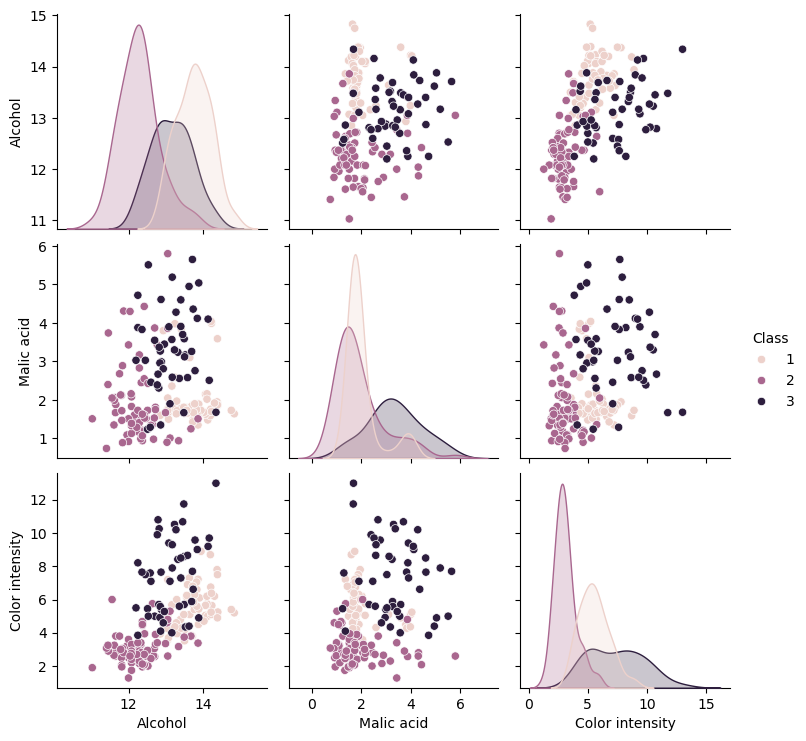

In [8]:
#Visualize feature distributions
# Use pairplot to visualize relationships between features and class labels
sns.pairplot(df, vars=['Alcohol', 'Malic acid', 'Color intensity'], hue='Class')
plt.show()

In [10]:
# Preprocessing - Normalize and split
# Separate features and labels
df_features = df.drop('Class', axis=1)
df_labels = df['Class']

# Normalize features using z-score normalization
X = (df_features - df_features.mean()) / df_features.std()
y = df_labels.values

# Split the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Evaluate different K and distance metrics
# Try different values of k and compare Euclidean and Manhattan distances
k_values = [1, 3, 5, 7, 9]
distance_metrics = ['euclidean', 'manhattan']

results = {}

for metric in distance_metrics:
    accuracies = []
    for k in k_values:
        model = KNNClassifier(k=k, distance_metric=metric)
        model.fit(X_train.values, y_train)
        acc = model.score(X_test.values, y_test)  # Calculate accuracy
        accuracies.append(acc)
    results[metric] = accuracies

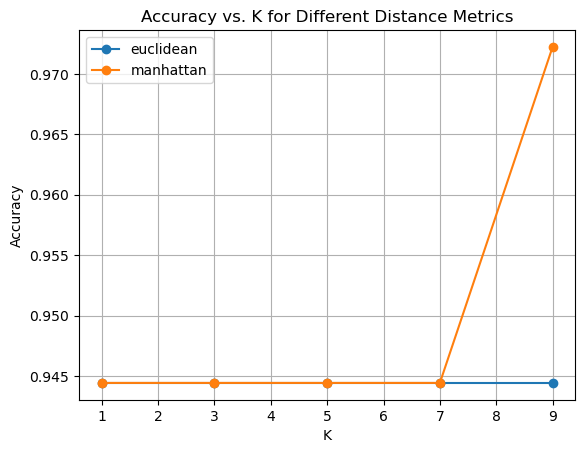

In [14]:
# Plot accuracy vs. K
# Visualize the effect of different K values on model accuracy
for metric in results:
    plt.plot(k_values, results[metric], marker='o', label=f"{metric}")

plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. K for Different Distance Metrics")
plt.legend()
plt.grid(True)
plt.show()


In [16]:
# Final evaluation with best K
# Evaluate the model using the best performing K and display the results
best_k = 3  # example choice
final_model = KNNClassifier(k=best_k, distance_metric='euclidean')
final_model.fit(X_train.values, y_train)
y_pred = final_model.predict(X_test.values)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))  # Show confusion matrix

print("\nClassification Report:")
print(classification_report(y_test, y_pred))  # Show precision, recall, f1-score

Confusion Matrix:
[[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]

Classification Report:
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.86      0.92        14
           3       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36

